In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
#from ast import increment_lineno
#from termios import INLCR
from sklearn.model_selection import StratifiedShuffleSplit

from skimage.transform import resize
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from cv2 import *
import os
#import torch
import imblearn
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE #use smote to augmentation
#we need to normalize

In [3]:
import tensorflow as tf
tf.test.is_gpu_available()

import tensorflow as tf
print(tf.__version__)

from sklearn.model_selection import StratifiedShuffleSplit
from skimage.transform import resize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import random
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

# Load data
import os
import cv2
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
2.7.0


#  Read Data

In [4]:
img_width = 224
img_height = 224


In [5]:
origa_path = "D:\/FL_PAPER_SUBMIT/gaucloma/archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/"
origa_G_path = os.listdir(origa_path + "Glaucoma_Positive")
origa_N_path = os.listdir(origa_path + "Glaucoma_Negative")

origa_G_data = []
for i in range(len(origa_G_path)):
    origa_G_image = cv2.imread(os.path.join(origa_path + "Glaucoma_Positive", origa_G_path[i]))[:,:,::-1]
    origa_G_image = cv2.resize(origa_G_image, (img_width, img_height))
    origa_G_image = preprocess_input(origa_G_image[np.newaxis, ...])[0]
    origa_G_data.append(origa_G_image)
origa_G_data = np.array(origa_G_data)
origa_G_label = [0]*(len(origa_G_data))
print('origa_G_data shape : ', origa_G_data.shape) #(479, 224, 224, 3)

origa_N_data = []
for i in range(len(origa_N_path)):
    origa_N_image = cv2.imread(os.path.join(origa_path + "Glaucoma_Negative", origa_N_path[i]))[:,:,::-1]
    origa_N_image = cv2.resize(origa_N_image, (img_width, img_height))
    origa_N_image = preprocess_input(origa_N_image[np.newaxis, ...])[0]
    origa_N_data.append(origa_N_image)
origa_N_data = np.array(origa_N_data)
origa_N_label = [1]*(len(origa_N_data))
print('origa_N_data shape : ', origa_N_data.shape)

origa_data = np.concatenate([origa_G_data,
                            origa_N_data], 0)
origa_label = np.concatenate([[0]*(len(origa_G_data)),
                             [1]*(len(origa_N_data))], 0)

origa_G_data shape :  (134, 224, 224, 3)
origa_N_data shape :  (386, 224, 224, 3)


# Drishti

In [6]:
Open1_path = "D:/FL_PAPER_SUBMIT/gaucloma/Drishti-GS1+arg/"
Open1_G_path = os.listdir(Open1_path + "glaucoma")
Open1_N_path = os.listdir(Open1_path + "normal")

# read Glaucoma image in Open1
Open1_G_data = []
for i in range(len(Open1_G_path)):
    Open1_G_image = cv2.imread(os.path.join(Open1_path + "glaucoma/", Open1_G_path[i]))[:,:,::-1] 
    Open1_G_image = cv2.resize(Open1_G_image, (img_width, img_height))
    Open1_G_image = preprocess_input(Open1_G_image[np.newaxis, ...])[0]
    Open1_G_data.append(Open1_G_image)
Open1_G_data = np.array(Open1_G_data)
Open1_G_label = [0]*(len(Open1_G_data))
print('Open1_G_data shape : ', Open1_G_data.shape) #(70, 224, 224, 3)

# read Normal image in Open1
Open1_N_data = []
for i in range(len(Open1_N_path)):
    Open1_N_image = cv2.imread(os.path.join(Open1_path + "normal/", Open1_N_path[i]))[:,:,::-1]
    Open1_N_image = cv2.resize(Open1_N_image, (img_width, img_height))
    Open1_N_image = preprocess_input(Open1_N_image[np.newaxis, ...])[0]
    Open1_N_data.append(Open1_N_image)
Open1_N_data = np.array(Open1_N_data)
Open1_N_label = [1]*(len(Open1_N_data))
print('Open1_N_data shape : ', Open1_N_data.shape) #(31, 224, 224, 3)

Open1_data = np.concatenate([Open1_G_data,
                            Open1_N_data], 0)
Open1_label = np.concatenate([[0]*(len(Open1_G_data)),
                             [1]*(len(Open1_N_data))], 0)


Open1_G_data shape :  (70, 224, 224, 3)
Open1_N_data shape :  (31, 224, 224, 3)


# Refuge

In [7]:
refuge_path = "D:/FL_PAPER_SUBMIT/gaucloma/refuge/Training400/"
refuge_G_path = os.listdir(refuge_path + "Glaucoma")
refuge_N_path = os.listdir(refuge_path + "Non-Glaucoma")

refuge_G_data = []
for i in range(len(refuge_G_path)):
    refuge_G_image = cv2.imread(os.path.join(refuge_path + "Glaucoma", refuge_G_path[i]))[:,:,::-1]
    refuge_G_image = cv2.resize(refuge_G_image, (img_width, img_height))
    refuge_G_image = preprocess_input(refuge_G_image[np.newaxis, ...])[0]
    refuge_G_data.append(refuge_G_image)
refuge_G_data = np.array(refuge_G_data)
refuge_G_label = [0]*(len(refuge_G_data))
print('refuge_G_data shape : ', refuge_G_data.shape) #(479, 224, 224, 3)

refuge_N_data = []
for i in range(len(refuge_N_path)):
    refuge_N_image = cv2.imread(os.path.join(refuge_path + "Non-Glaucoma", refuge_N_path[i]))[:,:,::-1]
    refuge_N_image = cv2.resize(refuge_N_image, (img_width, img_height))
    refuge_N_image = preprocess_input(refuge_N_image[np.newaxis, ...])[0]
    refuge_N_data.append(refuge_N_image)
refuge_N_data = np.array(refuge_N_data)
refuge_N_label = [1]*(len(refuge_N_data))
print('refuge_N_data shape : ', refuge_N_data.shape)

refuge_data = np.concatenate([refuge_G_data,
                            refuge_N_data], 0)
refuge_label = np.concatenate([[0]*(len(refuge_G_data)),
                             [1]*(len(refuge_N_data))], 0)

refuge_G_data shape :  (40, 224, 224, 3)
refuge_N_data shape :  (360, 224, 224, 3)


In [8]:
from sklearn.model_selection import train_test_split

origa_train_data, origa_valid_data, origa_train_label, origa_valid_label = train_test_split(origa_data,
                                                                                     origa_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_label,
                                                                                     random_state = 10)

origa_train_data, origa_test_data, origa_train_label, origa_test_label = train_test_split(origa_train_data,
                                                                                     origa_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_train_label,
                                                                                     random_state = 10)


refuge_train_data, refuge_test_data, refuge_train_label, refuge_test_label = train_test_split(refuge_data,
                                                                                     refuge_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_label,
                                                                                     random_state = 10)



refuge_train_data, refuge_valid_data, refuge_train_label, refuge_valid_label = train_test_split(refuge_train_data,
                                                                                     refuge_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_train_label,
                                                                                     random_state = 10)

# split the data into 80% train/ 20% test

Open1_train_data, Open1_test_data, Open1_train_label, Open1_test_label = train_test_split(Open1_data,
                                                                                          Open1_label,
                                                                                          test_size = 20,
                                                                                          stratify = Open1_label,
                                                                                          random_state = 10)


Open1_train_data, Open1_valid_data, Open1_train_label, Open1_valid_label = train_test_split(Open1_train_data,
                                                                                          Open1_train_label,
                                                                                          test_size = 16,
                                                                                          stratify = Open1_train_label,
                                                                                          random_state = 10)

print('origa train :', origa_train_data.shape, ',Test :', origa_test_data.shape)
print('refuge train :', refuge_train_data.shape, ',Test :', refuge_test_data.shape)
print('Open1 train :', Open1_train_data.shape, ',valid :', Open1_valid_data.shape)
print(origa_train_label.shape)
print(refuge_train_label.shape)
print(Open1_train_label.shape)

central_train_data = np.concatenate([refuge_train_data,
                                    origa_train_data,
                                    Open1_train_data], 0)

central_valid_data = np.concatenate([refuge_valid_data,
                                    origa_valid_data,
                                    Open1_valid_data], 0)

central_test_data = np.concatenate([refuge_test_data,
                                    origa_test_data,
                                    Open1_test_data], 0)

central_train_label = np.concatenate([refuge_train_label,
                                     origa_train_label,
                                     Open1_train_label], 0)


central_valid_label = np.concatenate([refuge_valid_label,
                                     origa_valid_label,
                                     Open1_valid_label], 0)

central_test_label = np.concatenate([refuge_test_label,
                                     origa_test_label,
                                     Open1_test_label], 0)


origa train : (332, 224, 224, 3) ,Test : (84, 224, 224, 3)
refuge train : (256, 224, 224, 3) ,Test : (80, 224, 224, 3)
Open1 train : (65, 224, 224, 3) ,valid : (16, 224, 224, 3)
(332,)
(256,)
(65,)


# function

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion_matrix_result(model, data, true_label, name):
    predict_prob = model.predict(data)
    predict_label = np.argmax(predict_prob,axis=1)
    
    class_names = [ 'Glaucoma', 'Normal' ]
    
    mat = confusion_matrix(true_label, predict_label)
    
    matrix = np.arange(4).reshape((2, 2))
    plt.figure(figsize=(4, 4))
    sns.heatmap(mat, annot=True, cbar=True, cmap="Blues",  fmt='2.0f',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.ylabel('True Label', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=16)
    plt.title(name + '\nAccuracy:{0:.3f}'.format(accuracy_score(true_label, predict_label)), fontsize=18)
    plt.show()
    
    return 

# origa  

In [10]:
# Plot results
import matplotlib.pyplot as plt

def loss_acc_plot(train_loss, val_loss, train_acc, val_acc, name):

        plt.figure(figsize = (20,4))
        plt.subplot(1,2,1)
        plt.plot(train_loss)
        plt.plot(val_loss)
        plt.legend(loc = "lower left")
        plt.legend(['Train Loss','Validation Loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        # plt.ylim([min(plt.ylim()),0.6])
        plt.title('Training and Validation Loss for ' + name)

        plt.subplot(1,2,2)
        plt.plot(train_acc)
        plt.plot(val_acc)
        plt.legend(loc = "lower right")
        plt.legend(['Train Accuracy','Validation Accuracy'])
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.title('Training and Validation Accuracy for ' + name)
        
        return

In [11]:
def increase_smote_data(model, train_data, train_label, times):
    
    # prdict the probability of glaucoma and normal
    predict_prob = model.predict(train_data)
    predict_label = np.argmax(predict_prob,axis=1)
    
    # find the data
    #把分隊分錯的結果找出
    true_G_pred_G = np.where((train_label==0) & (predict_label==0))[0]
    true_G_pred_N = np.where((train_label==0) & (predict_label==1))[0]
    true_N_pred_G = np.where((train_label==1) & (predict_label==0))[0]
    true_N_pred_N = np.where((train_label==1) & (predict_label==1))[0]
    true_G_pred_G_data = train_data[true_G_pred_G]
    true_G_pred_N_data = train_data[true_G_pred_N]
    true_N_pred_G_data = train_data[true_N_pred_G]
    true_N_pred_N_data = train_data[true_N_pred_N]
    print('=========================================')
    print('true_G_pred_G :', len(true_G_pred_G), ' & true_G_pred_N :', len(true_G_pred_N) )
    if len(true_G_pred_N)>0:
        print('the index of true_G_pred_N is ', true_G_pred_N)
    print('----------------------------------------')
    print('true_N_pred_N :', len(true_N_pred_N), ' & true_N_pred_G :', len(true_N_pred_G) )
    if len(true_N_pred_G)>0:
        print('the index of true_N_pred_G is ', true_N_pred_G)
    print('----------------------------------------')
    
    # increase glaucoma (SMOTE)
    if len(true_G_pred_N) > 1:
        '''
        parameter k_neighbors in SMOTE
        if len(true_G_pred_N) < 5, k_neighbors = len(true_G_pred_N), else k_neighbors = 5 
        '''
        
        true_G_data = np.concatenate([true_G_pred_G_data, true_G_pred_N_data], 0)
        true_G_data = true_G_data/255
        true_G_data = np.reshape(true_G_data, (true_G_data.shape[0], img_width*img_height*3))
        # set true_G_pred_G_data=0, true_G_pred_N_data=1
        true_G_label = np.concatenate([[0]*(len(true_G_pred_G_data)), [1]*(len(true_G_pred_N_data))], 0)
        #print(true_G_data.shape)        

        if len(true_G_pred_N) < 6:
            k1 = len(true_G_pred_N)-1
        else:
            k1 = 5
        smote = SMOTE(k_neighbors = k1, sampling_strategy={0:len(true_G_pred_G_data), 1:len(true_G_pred_N_data)*times}, random_state=10)
        true_G_X_resample, true_G_y_resample = smote.fit_resample(true_G_data, true_G_label)
        true_G_X_resample =  np.reshape(true_G_X_resample, (true_G_X_resample.shape[0], img_width, img_height, 3))
        true_G_X_resample = true_G_X_resample*255
        true_G_X_resample = true_G_X_resample.astype(int)
        true_G_synthetic_data = true_G_X_resample[true_G_data.shape[0]: ]
        #print(true_G_X_resample.shape) 
        print(true_G_synthetic_data.shape)
        
        G_synthetic_label = np.repeat(0, true_G_synthetic_data.shape[0])

    # increase normal (SMOTE)
    if len(true_N_pred_G) > 1:  
        '''
        parameter k_neighbors in SMOTE
        if len(true_G_pred_N) < 5, k_neighbors = len(true_G_pred_N), else k_neighbors = 5 
        '''
    
        true_N_data = np.concatenate([true_N_pred_N_data, true_N_pred_G_data], 0)
        true_N_data = true_N_data/255
        true_N_data = np.reshape(true_N_data, (true_N_data.shape[0], img_width*img_height*3))
        # set true_N_pred_N_data=0, true_N_pred_G_data=1
        true_N_label = np.concatenate([[0]*(len(true_N_pred_N_data)), [1]*(len(true_N_pred_G_data))], 0)
        #print(true_N_data.shape) 

        if len(true_N_pred_G) < 6:
            k2 = len(true_N_pred_G)-1
        else:
            k2 = 5
        smote = SMOTE(k_neighbors = k2, sampling_strategy={0:len(true_N_pred_N_data), 1:len(true_N_pred_G_data)},random_state =10)
        true_N_X_resample, true_N_y_resample = smote.fit_resample(true_N_data, true_N_label)
        true_N_X_resample = np.reshape(true_N_X_resample, (true_N_X_resample.shape[0], img_width, img_height, 3))
        true_N_X_resample = true_N_X_resample*255
        true_N_X_resample = true_N_X_resample.astype(int)
        true_N_synthetic_data = true_N_X_resample[true_N_data.shape[0]: ]
        #print(true_N_X_resample.shape) 
        print(true_N_synthetic_data.shape)
        
        N_synthetic_label = np.repeat(1, true_N_synthetic_data.shape[0])
    
    # concatenate origin data and smote data
    if (len(true_G_pred_N) > 1 and len(true_N_pred_G) > 1):
        train_data_extend = np.concatenate( [train_data,
                                             true_G_synthetic_data,
                                             true_N_synthetic_data], 0)
        train_label_extend = np.concatenate( [train_label,
                                              G_synthetic_label,
                                              N_synthetic_label], 0)
    elif (len(true_G_pred_N) > 1 and len(true_N_pred_G) <= 1):
        train_data_extend = np.concatenate( [train_data,
                                             true_G_synthetic_data], 0)
        train_label_extend = np.concatenate( [train_label,
                                              G_synthetic_label], 0)
    elif (len(true_G_pred_N) <= 1 and len(true_N_pred_G) > 1):
        train_data_extend = np.concatenate( [train_data,
                                             true_N_synthetic_data], 0)
        train_label_extend = np.concatenate( [train_label,
                                              N_synthetic_label], 0)
    else :
        train_data_extend = train_data
        train_label_extend = train_label
        
    print('The origin data size :', train_data.shape)
    print('The extend data size :', train_data_extend.shape)
    print('=========================================')
    
    return train_data_extend, train_label_extend

# model

In [12]:
from xml.etree.ElementInclude import include
import keras_efficientnet_v2
#model = keras_efficientnet_v2.EfficientNetV2S(pretrained="imagenet")
efnb0 = keras_efficientnet_v2.EfficientNetV2B0(num_classes = 0,
                                               input_shape=(224, 224, 3),
                                               pretrained="imagenet")


>>>> Load pretrained from: C:\Users\user\.keras\models/efficientnetv2\efficientnetv2-b0-imagenet.h5


In [13]:
# %% build model
from tensorflow import keras
#from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, BatchNormalization
n_classes =2
input_shape = (img_width, img_height, 3)
efnb0 = tf.keras.applications.efficientnet.EfficientNetB0(weights='imagenet', 
                              include_top=False, 
                              input_shape=input_shape, 
                              classes=n_classes)     ## TODO: wrong

def efficient_model():
    model = Sequential()
    model.add(efnb0)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(32, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.2))
    #model.add(Dense(16, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    return model



# image datagenerator

In [14]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
Reduce = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 3 , min_lr = 1e-6,
                              mode='auto',verbose=1)
#early stopping to monitor the validation loss and avoid overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, 
                        patience=5, restore_best_weights=True)

def step_decay(epoch):     
    if (epoch < 5):
        return 5e-5
    elif (epoch < 10):
        return 1e-4
    elif (epoch < 15):
        return 1e-5
    elif (epoch < 20):
        return 1e-6
    else:
        return 1e-6
    
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

callbacks_list = [lrate, early_stop]

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.0,
                              height_shift_range=0.0,
                              brightness_range=None,
                              shear_range=0.0,
                              zoom_range=0.0,
                              horizontal_flip=True,
                              vertical_flip=True,
                              rescale=None)

In [15]:
train_acc_refuge_history = []
train_loss_refuge_history = []
train_auc_refuge_history = []
val_acc_refuge_history = []
val_auc_refuge_history = []
val_loss_refuge_history = []
test_acc_refuge = []

train_acc_origa_history = []
train_auc_origa_history = []
train_loss_origa_history = []
val_acc_origa_history = []
val_auc_origa_history = []
val_loss_origa_history = []
test_acc_origa = []

train_acc_Open1_history = []
train_auc_Open1_history = []
train_loss_Open1_history = []
val_acc_Open1_history = []
val_auc_Open1_history = []
val_loss_Open1_history = []
test_acc_Open1 = []

train_acc_global_history = []
train_loss_global_history = []
val_acc_global_history = []
val_loss_global_history = []

In [16]:
origa_train_data_extend, origa_train_label_extend = origa_train_data, origa_train_label

tf.random.set_seed(500)
import random
seed = 500

np.random.seed(seed)
random.seed(seed)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
epochs = 200
batch_size = 16

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 測試

In [18]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight 
a = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced',
                                                 classes = a,
                                                 y = origa_train_label)

In [19]:
class_dict = dict()
for index, value in enumerate(class_weights):
    class_dict[index] = value

class_dict

{0: 1.9529411764705882, 1: 0.6720647773279352}

In [ ]:
origa_model = efficient_model()

origa_model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/origa.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_origa = [checkpoint]
origa_history = origa_model.fit(train_data=(origa_train_data_extend,origa_train_label_extend),
                                validation_data=(origa_valid_data, np.eye(2)[origa_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_origa,
                                            class_weight= class_dict,
                                            verbose = 1)

train_acc_origa_history.extend(origa_history.history['accuracy'])
train_loss_origa_history.extend(origa_history.history['loss'])
val_acc_origa_history.extend(origa_history.history['val_accuracy'])
val_loss_origa_history.extend(origa_history.history['val_loss'])

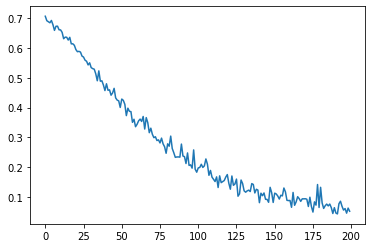

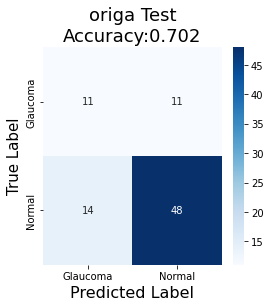

In [21]:
plt.plot(train_loss_origa_history)
confusion_matrix_result(origa_model, origa_test_data, origa_test_label, name='origa Test')

原本

In [ ]:
origa_model = efficient_model()

origa_model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/origa.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_origa = [checkpoint]
origa_history = origa_model.fit_generator(datagen.flow(origa_train_data_extend, np.eye(2)[origa_train_label_extend], batch_size = batch_size),
                                            steps_per_epoch = len(origa_train_label) / batch_size,
                                            validation_data = (origa_valid_data, np.eye(2)[origa_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_origa,
                                            verbose = 1)

train_acc_origa_history.extend(origa_history.history['accuracy'])
train_loss_origa_history.extend(origa_history.history['loss'])
val_acc_origa_history.extend(origa_history.history['val_accuracy'])
val_loss_origa_history.extend(origa_history.history['val_loss'])

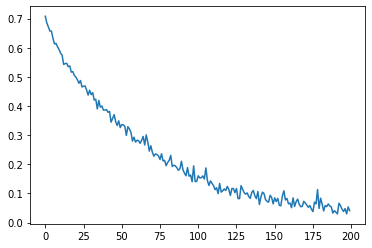

In [20]:
plt.plot(train_loss_origa_history)

In [60]:
origa_model.save('D:/individual_model_new/origa.hdf5')

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [61]:
print(max_origa_save)

100


In [19]:
def max_find(find_list):
    i = 0
    tmp1 = 0
    tmp = find_list[0]
    for number in find_list:
        if(number > tmp):
            tmp = number
            i+=1
            tmp1 = i
        else:
            i+=1
    return tmp1

max_origa_save = max_find(val_acc_origa_history)

In [25]:
val_acc_origa_history


[0.6538461446762085,
 0.625,
 0.6538461446762085,
 0.6634615659713745,
 0.7211538553237915,
 0.7884615659713745,
 0.7596153616905212,
 0.7596153616905212,
 0.7788461446762085,
 0.7884615659713745]

---------------  ORIGA  --------------


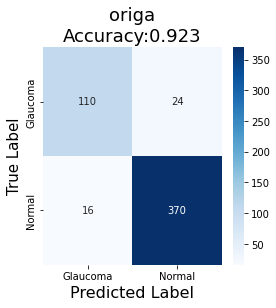

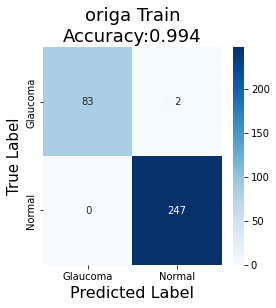

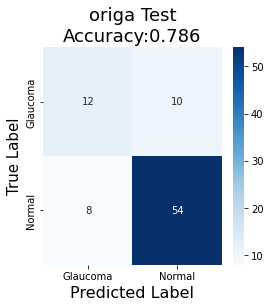

In [21]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(origa_model, origa_data, origa_label, name='origa')
confusion_matrix_result(origa_model, origa_train_data, origa_train_label, name='origa Train')
confusion_matrix_result(origa_model, origa_test_data, origa_test_label, name='origa Test')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation Loss origa')

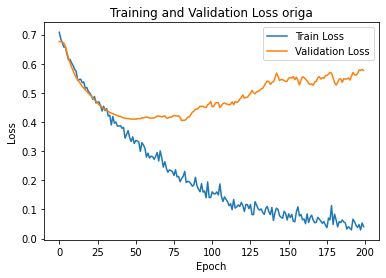

In [20]:
plt.plot(train_loss_origa_history)
plt.plot(val_loss_origa_history)
plt.legend(loc = "lower left")
plt.legend(['Train Loss','Validation Loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss origa')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


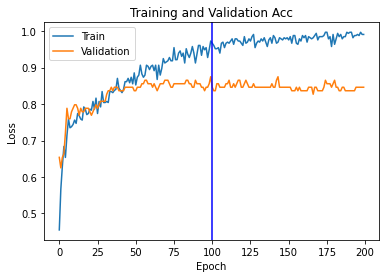

In [21]:
plt.plot(train_acc_origa_history)
plt.plot(val_acc_origa_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')
plt.axvline(x=max_origa_save, color='b', label='axvline - full height')

# refuge

In [22]:
refuge_train_data, refuge_test_data, refuge_train_label, refuge_test_label = train_test_split(refuge_data,
                                                                                     refuge_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_label,
                                                                                     random_state = 10)

refuge_train_data, refuge_valid_data, refuge_train_label, refuge_valid_label = train_test_split(refuge_train_data,
                                                                                               refuge_train_label,
                                                                                               test_size = 0.2,
                                                                                               stratify = refuge_train_label,
                                                                                               random_state = 10)

In [23]:
refuge_model = efficient_model()

refuge_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#filepath="D:/refuge_1.hdf5"

#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
#              mode='max')
#callbacks_list_refuge = [checkpoint]
refuge_history = refuge_model.fit_generator(datagen.flow(refuge_train_data, np.eye(2)[refuge_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(refuge_train_label) / batch_size,
                                            validation_data = (refuge_valid_data, np.eye(2)[refuge_valid_label]),
                                            epochs = epochs,
 #                                           callbacks = callbacks_list_refuge,
                                            verbose = 1)

train_acc_refuge_history.extend(refuge_history.history['accuracy'])
train_loss_refuge_history.extend(refuge_history.history['loss'])
val_acc_refuge_history.extend(refuge_history.history['val_accuracy'])
val_loss_refuge_history.extend(refuge_history.history['val_loss'])

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\Users\user\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
16/16 [==============================] - 11s 225ms/step - loss: 0.6347 - accuracy: 0.6836 - val_loss: 0.5248 - val_accuracy: 0.8906
Epoch 2/200
16/16 [==============================] - 3s 148ms/step - loss: 0.4294 - accuracy: 0.9180 - val_loss: 0.3679 - val_accuracy: 0.9062
Epoch 3/200
16/16 [==============================] - 2s 149ms/step - loss: 0.2988 - accuracy: 0.9258 - val_loss: 0.2409 - val_accuracy: 0.9219
Epoch 4/200
16/16 [==============================] - 3s 152ms/step - loss: 0.2200 - accuracy: 0.9297 - val_loss: 0.2503 - val_accuracy: 0.9219
Epoch 5/200
16/16 [==============================] - 3s 158ms/step - loss: 0.1818 - accuracy: 0.9453 - val_loss: 0.1815 - val_accuracy: 0.9531
Epoch 6/200
16/16 [==============================] - 3s 150ms/step - loss: 0.1162 - accuracy: 0.9766 - val_loss: 0.1981 - val_accuracy: 0.9375
Epoch 7/200
16/16 [==============================] - 3s 150ms/step - loss: 0.1097 - accuracy: 0.9648 - val_loss: 0.1774 - val_accuracy: 0.953

In [58]:
refuge_model.save('D:/individual_model_new/refuge.hdf5')

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [59]:
print(max_refuge_save)

19


---------------  ORIGA  --------------


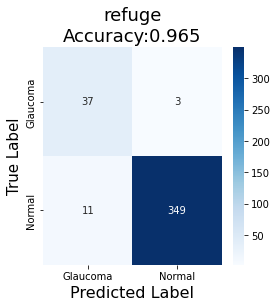

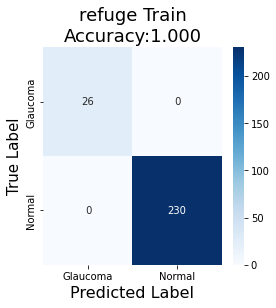

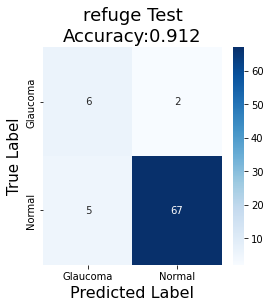

In [26]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(refuge_model, refuge_data, refuge_label, name='refuge')
confusion_matrix_result(refuge_model, refuge_train_data, refuge_train_label, name='refuge Train')
confusion_matrix_result(refuge_model, refuge_test_data, refuge_test_label, name='refuge Test')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation Loss origa')

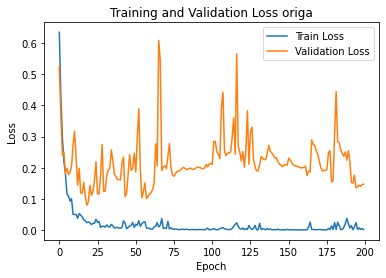

In [24]:
plt.plot(train_loss_refuge_history)
plt.plot(val_loss_refuge_history)
plt.legend(loc = "lower left")
plt.legend(['Train Loss','Validation Loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss origa')



In [25]:
def max_find(find_list):
    i = 0
    tmp1 = 0
    tmp = find_list[0]
    for number in find_list:
        if(number > tmp):
            tmp = number
            i+=1
            tmp1 = i
        else:
            i+=1
    return tmp1

max_refuge_save = max_find(val_acc_refuge_history)
#plt.axvline(x=max_refuge_save, color='b', label='axvline - full height')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


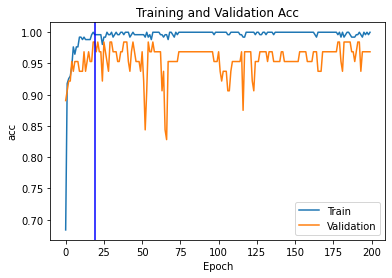

In [26]:

plt.plot(train_acc_refuge_history)
plt.plot(val_acc_refuge_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')
plt.axvline(x=max_refuge_save, color='b', label='axvline - full height')

# Drishti 

In [23]:
train_acc_india_history = []
train_auc_india_history = []
train_loss_india_history = []
val_acc_india_history = []
val_auc_india_history = []
val_loss_india_history = []
test_acc_india = []

# 測試

In [22]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight 
a = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced',
                                                 classes = a,
                                                 y = Open1_train_label)
class_dict = dict()
for index, value in enumerate(class_weights):
    class_dict[index] = value

class_dict

{0: 0.7222222222222222, 1: 1.625}

In [24]:
india_model = efficient_model()

india_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/india_1.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_refuge = [checkpoint]
india_history = india_model.fit_generator(datagen.flow(Open1_train_data, np.eye(2)[Open1_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(Open1_train_label) / batch_size,
                                            validation_data = (Open1_valid_data, np.eye(2)[Open1_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_refuge,
                                            verbose = 1)

train_acc_india_history.extend(india_history.history['accuracy'])
train_loss_india_history.extend(india_history.history['loss'])
val_acc_india_history.extend(india_history.history['val_accuracy'])
val_loss_india_history.extend(india_history.history['val_loss'])

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\Users\user\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
5/4 [====================================] - ETA: 0s - loss: 0.6776 - accuracy: 0.6308
Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to D:/india_1.hdf5


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4/4 [==============================] - 12s 1s/step - loss: 0.6776 - accuracy: 0.6308 - val_loss: 0.6078 - val_accuracy: 0.7500
Epoch 2/200
5/4 [====================================] - ETA: 0s - loss: 0.6319 - accuracy: 0.7538
Epoch 00002: val_accuracy did not improve from 0.75000
4/4 [==============================] - 1s 203ms/step - loss: 0.6319 - accuracy: 0.7538 - val_loss: 0.5613 - val_accuracy: 0.6875
Epoch 3/200
5/4 [====================================] - ETA: 0s - loss: 0.5611 - accuracy: 0.8308
Epoch 00003: val_accuracy did not improve from 0.75000
4/4 [==============================] - 1s 210ms/step - loss: 0.5611 - accuracy: 0.8308 - val_loss: 0.5312 - val_accuracy: 0.6875
Epoch 4/200
5/4 [====================================] - ETA: 0s - loss: 0.5402 - accuracy: 0.7692
Epoch 00004: val_accuracy did not improve from 0.75000
4/4 [==============================] - 1s 221ms/step - loss: 0.5402 - accuracy: 0.7692 - val_loss: 0.5258 - val_accuracy: 0.7500
Epoch 5/200
5/4 [=======

---------------  ORIGA  --------------


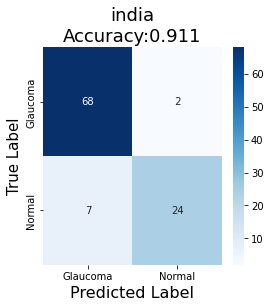

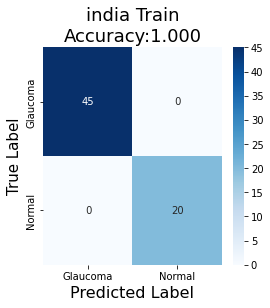

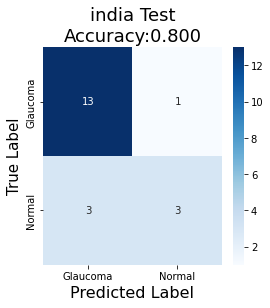

In [25]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(india_model, Open1_data, Open1_label, name='india')
confusion_matrix_result(india_model, Open1_train_data, Open1_train_label, name='india Train')
confusion_matrix_result(india_model, Open1_test_data, Open1_test_label, name='india Test')

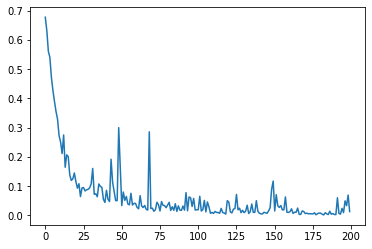

In [26]:
plt.plot(train_loss_india_history)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation acc')

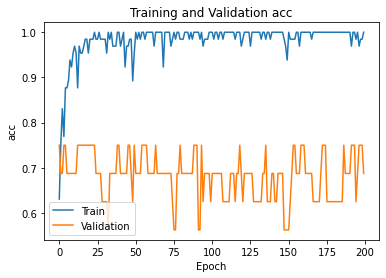

In [27]:
plt.plot(train_acc_india_history)
plt.plot(val_acc_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.title('Training and Validation acc')

#max_refuge_save = max_find(val_acc_origa_history)
#plt.axvline(x=max_india_save, color='b', label='axvline - full height')

# 原本

In [28]:
india_model = efficient_model()

india_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/india_1.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_refuge = [checkpoint]
india_history = india_model.fit_generator(datagen.flow(Open1_train_data, np.eye(2)[Open1_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(Open1_train_label) / batch_size,
                                            validation_data = (Open1_valid_data, np.eye(2)[Open1_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_refuge,
                                            verbose = 1)

train_acc_india_history.extend(india_history.history['accuracy'])
train_loss_india_history.extend(india_history.history['loss'])
val_acc_india_history.extend(india_history.history['val_accuracy'])
val_loss_india_history.extend(india_history.history['val_loss'])

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
5/4 [====================================] - ETA: 0s - loss: 0.6873 - accuracy: 0.6154
Epoch 00001: val_accuracy improved from -inf to 0.37500, saving model to D:/india_1.hdf5


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4/4 [==============================] - 12s 1s/step - loss: 0.6873 - accuracy: 0.6154 - val_loss: 0.7458 - val_accuracy: 0.3750
Epoch 2/200
5/4 [====================================] - ETA: 0s - loss: 0.6016 - accuracy: 0.8000
Epoch 00002: val_accuracy improved from 0.37500 to 0.62500, saving model to D:/india_1.hdf5
4/4 [==============================] - 3s 740ms/step - loss: 0.6016 - accuracy: 0.8000 - val_loss: 0.7195 - val_accuracy: 0.6250
Epoch 3/200
5/4 [====================================] - ETA: 0s - loss: 0.5495 - accuracy: 0.7846
Epoch 00003: val_accuracy did not improve from 0.62500
4/4 [==============================] - 1s 223ms/step - loss: 0.5495 - accuracy: 0.7846 - val_loss: 0.6897 - val_accuracy: 0.6250
Epoch 4/200
5/4 [====================================] - ETA: 0s - loss: 0.5007 - accuracy: 0.8154
Epoch 00004: val_accuracy did not improve from 0.62500
4/4 [==============================] - 1s 202ms/step - loss: 0.5007 - accuracy: 0.8154 - val_loss: 0.6519 - val_accu

In [56]:
india_model.save('D:/individual_model_new/india.hdf5')

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [57]:
print(max_india_save)

26


# tmp result

---------------  ORIGA  --------------


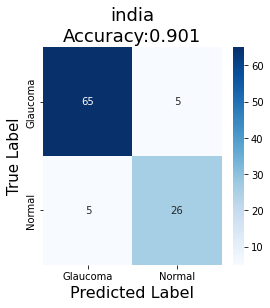

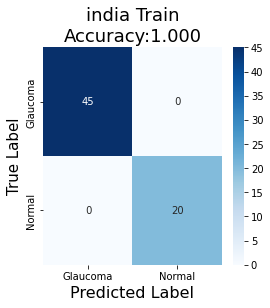

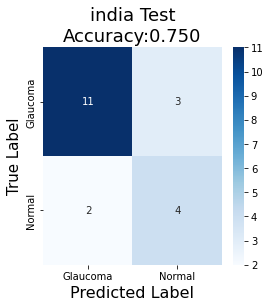

In [71]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(india_model, Open1_data, Open1_label, name='india')
confusion_matrix_result(india_model, Open1_train_data, Open1_train_label, name='india Train')
confusion_matrix_result(india_model, Open1_test_data, Open1_test_label, name='india Test')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation loss')

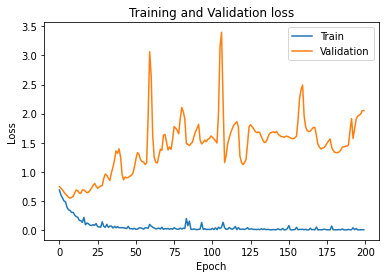

In [29]:
plt.plot(train_loss_india_history)
plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')

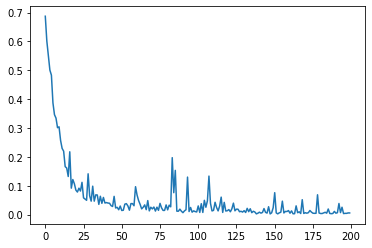

In [30]:
plt.plot(train_loss_india_history)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation loss')

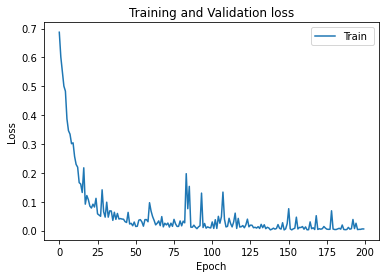

In [31]:
plt.plot(train_loss_india_history)
#plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')

In [32]:

max_india_save = max_find(val_acc_india_history)
#plt.axvline(x=max_refuge_save, color='b', label='axvline - full height')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


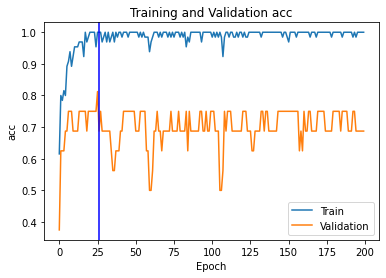

In [33]:
plt.plot(train_acc_india_history)
plt.plot(val_acc_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.title('Training and Validation acc')

#max_refuge_save = max_find(val_acc_origa_history)
plt.axvline(x=max_india_save, color='b', label='axvline - full height')

# result

---------------  ORIGA  --------------


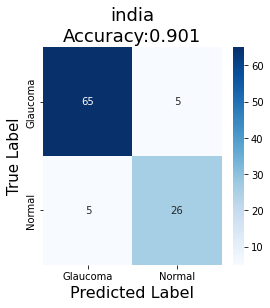

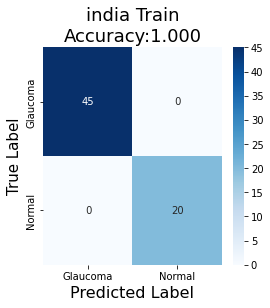

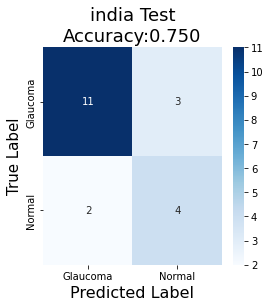

In [73]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(india_model, Open1_data, Open1_label, name='india')
confusion_matrix_result(india_model, Open1_train_data, Open1_train_label, name='india Train')
confusion_matrix_result(india_model, Open1_test_data, Open1_test_label, name='india Test')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation Acc')

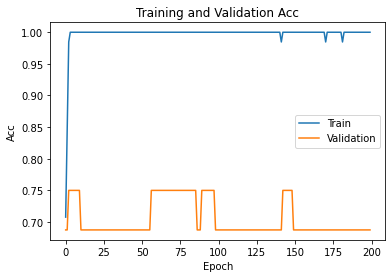

In [ ]:

plt.plot(train_acc_india_history)
plt.plot(val_acc_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation loss')

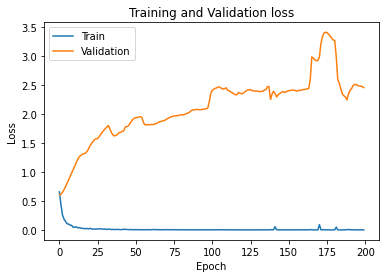

In [ ]:
plt.plot(train_loss_india_history)
plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training india loss')

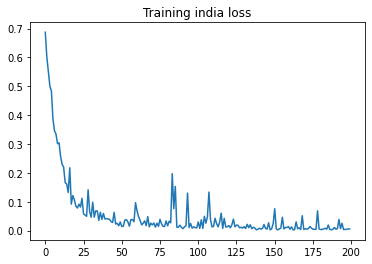

In [42]:
plt.plot(train_loss_india_history)
plt.title('Training india loss')

# central 

In [18]:
train_acc_central_history = []
train_loss_central_history = []
val_acc_central_history = []
val_loss_central_history = []

#central all valid

In [19]:
central_model = efficient_model()

central_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/central.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_ = [checkpoint]
central_history = central_model.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(central_train_label) / batch_size,
                                            validation_data = (central_valid_data, np.eye(2)[central_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_,
                                            verbose = 1)

train_acc_central_history.extend(central_history.history['accuracy'])
train_loss_central_history.extend(central_history.history['loss'])
val_acc_central_history.extend(central_history.history['val_accuracy'])
val_loss_central_history.extend(central_history.history['val_loss'])

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\Users\user\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
41/40 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.7335
Epoch 00001: val_accuracy improved from -inf to 0.76087, saving model to D:/central.hdf5


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


40/40 [==============================] - 24s 316ms/step - loss: 0.5814 - accuracy: 0.7335 - val_loss: 0.5113 - val_accuracy: 0.7609
Epoch 2/200
41/40 [==============================] - ETA: 0s - loss: 0.4325 - accuracy: 0.8162
Epoch 00002: val_accuracy improved from 0.76087 to 0.78804, saving model to D:/central.hdf5
40/40 [==============================] - 10s 245ms/step - loss: 0.4325 - accuracy: 0.8162 - val_loss: 0.4848 - val_accuracy: 0.7880
Epoch 3/200
41/40 [==============================] - ETA: 0s - loss: 0.3832 - accuracy: 0.8346
Epoch 00003: val_accuracy did not improve from 0.78804
40/40 [==============================] - 6s 145ms/step - loss: 0.3832 - accuracy: 0.8346 - val_loss: 0.4604 - val_accuracy: 0.7772
Epoch 4/200
41/40 [==============================] - ETA: 0s - loss: 0.3310 - accuracy: 0.8591
Epoch 00004: val_accuracy improved from 0.78804 to 0.79891, saving model to D:/central.hdf5
40/40 [==============================] - 9s 207ms/step - loss: 0.3310 - accuracy:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training loss')

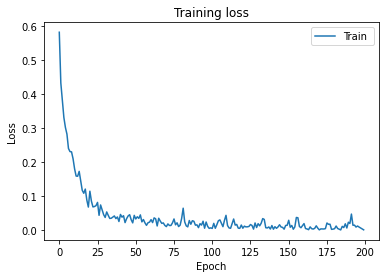

In [20]:
plt.plot(train_loss_central_history)
#plt.plot(train_loss_origa_history)
#plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train '])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training loss')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training loss')

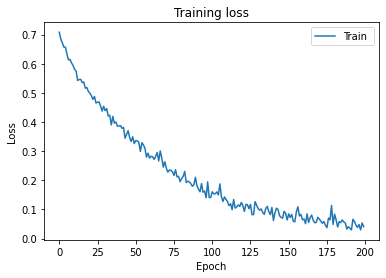

In [24]:
#plt.plot(train_loss_central_history)
plt.plot(train_loss_origa_history)
#plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train '])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training loss')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'all')

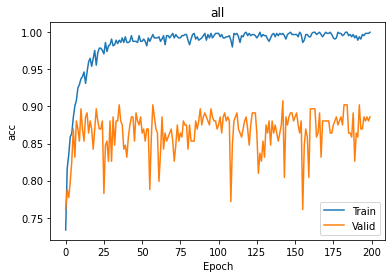

In [21]:
plt.plot(train_acc_central_history)
plt.plot(val_acc_central_history)
plt.legend(loc = "lower left")
plt.legend(['Train', 'Valid'])
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.title('all')


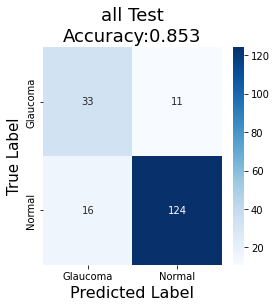

In [22]:
confusion_matrix_result(central_model, central_test_data, central_test_label, name='all Test')

#central valid origa

In [18]:
train_acc_central_history_origa = []
train_loss_central_history_origa = []
val_acc_central_history_origa = []
val_loss_central_history_origa = []

In [19]:
central_model_origa = efficient_model()

central_model_origa.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/central_valid_origa.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_ = [checkpoint]
central_history_origa = central_model_origa.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(central_train_label) / batch_size,
                                            validation_data = (origa_valid_data, np.eye(2)[origa_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_,
                                            verbose = 1)

train_acc_central_history_origa.extend(central_history_origa.history['accuracy'])
train_loss_central_history_origa.extend(central_history_origa.history['loss'])
val_acc_central_history_origa.extend(central_history_origa.history['val_accuracy'])
val_loss_central_history_origa.extend(central_history_origa.history['val_loss'])

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\Users\user\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
41/40 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.7335
Epoch 00001: val_accuracy improved from -inf to 0.74038, saving model to D:/central_valid_origa.hdf5


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


40/40 [==============================] - 20s 254ms/step - loss: 0.5814 - accuracy: 0.7335 - val_loss: 0.5391 - val_accuracy: 0.7404
Epoch 2/200
41/40 [==============================] - ETA: 0s - loss: 0.4325 - accuracy: 0.8162
Epoch 00002: val_accuracy improved from 0.74038 to 0.77885, saving model to D:/central_valid_origa.hdf5
40/40 [==============================] - 8s 205ms/step - loss: 0.4325 - accuracy: 0.8162 - val_loss: 0.5242 - val_accuracy: 0.7788
Epoch 3/200
41/40 [==============================] - ETA: 0s - loss: 0.3832 - accuracy: 0.8346
Epoch 00003: val_accuracy did not improve from 0.77885
40/40 [==============================] - 6s 142ms/step - loss: 0.3832 - accuracy: 0.8346 - val_loss: 0.4974 - val_accuracy: 0.7596
Epoch 4/200
41/40 [==============================] - ETA: 0s - loss: 0.3310 - accuracy: 0.8591
Epoch 00004: val_accuracy did not improve from 0.77885
40/40 [==============================] - 6s 141ms/step - loss: 0.3310 - accuracy: 0.8591 - val_loss: 0.4835

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'all')

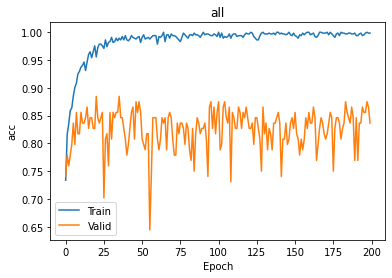

In [20]:
plt.plot(train_acc_central_history_origa)
plt.plot(val_acc_central_history_origa)
plt.legend(loc = "lower left")
plt.legend(['Train', 'Valid'])
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.title('all')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training loss')

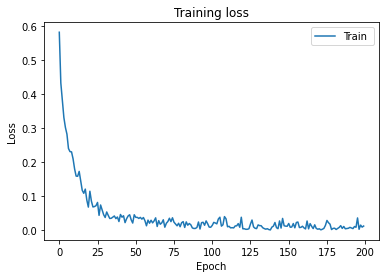

In [20]:
plt.plot(train_loss_central_history_origa)
#plt.plot(train_loss_origa_history)
#plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train '])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training loss')


In [ ]:
central_model_origa = efficient_model()

central_model_origa.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/central_valid_origa.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_ = [checkpoint]
central_history_origa = central_model_origa.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(central_train_label) / batch_size,
                                            validation_data = (origa_valid_data, np.eye(2)[origa_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_,
                                            verbose = 1)

train_acc_central_history_origa.extend(central_history_origa.history['accuracy'])
train_loss_central_history_origa.extend(central_history_origa.history['loss'])
val_acc_central_history_origa.extend(central_history_origa.history['val_accuracy'])
val_loss_central_history_origa.extend(central_history_origa.history['val_loss'])
plt.plot(train_loss_central_history_origa)
#plt.plot(train_loss_origa_history)
#plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train '])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training loss')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training loss')

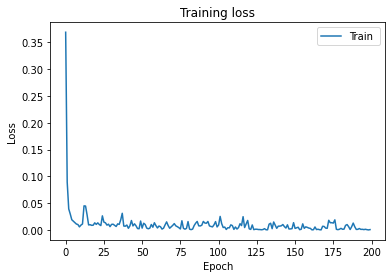

In [22]:
plt.plot(train_loss_central_history_origa[200:400])
#plt.plot(train_loss_origa_history)
#plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train '])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training loss')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training loss')

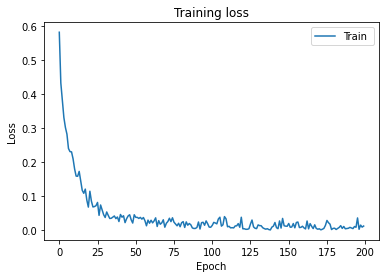

In [23]:
plt.plot(train_loss_central_history_origa[0:200])
#plt.plot(train_loss_origa_history)
#plt.plot(val_loss_india_history)
plt.legend(loc = "lower left")
plt.legend(['Train '])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training loss')

#central valid refuge

In [ ]:
train_acc_central_history_refuge = []
train_loss_central_history_refuge = []
val_acc_central_history_refuge = []
val_loss_central_history_refuge = []
central_model = efficient_model()

central_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/central_valid_refuge.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_ = [checkpoint]
central_history = central_model.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(central_train_label) / batch_size,
                                            validation_data = (refuge_valid_data, np.eye(2)[refuge_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_,
                                            verbose = 1)

train_acc_central_history.extend(central_history.history['accuracy'])
train_loss_central_history.extend(central_history.history['loss'])
val_acc_central_history.extend(central_history.history['val_accuracy'])
val_loss_central_history.extend(central_history.history['val_loss'])

#central valid india

In [ ]:
train_acc_central_history_india = []
train_loss_central_history_india = []
val_acc_central_history_india = []
val_loss_central_history_india = []
central_model_india = efficient_model()

central_model_india.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/central_valid_india.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_ = [checkpoint]
central_history_india = central_model_india.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(central_train_label) / batch_size,
                                            validation_data = (Open1_valid_data, np.eye(2)[Open1_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_,
                                            verbose = 1)

train_acc_central_history_india.extend(central_history_india.history['accuracy'])
train_loss_central_history_india.extend(central_history_india.history['loss'])
val_acc_central_history_india.extend(central_history_india.history['val_accuracy'])
val_loss_central_history_india.extend(central_history_india.history['val_loss'])

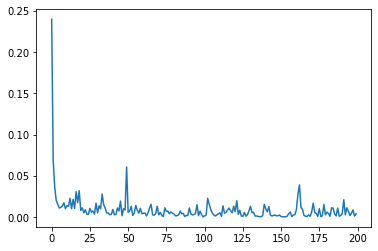

In [24]:
plt.plot(train_loss_central_history_india)

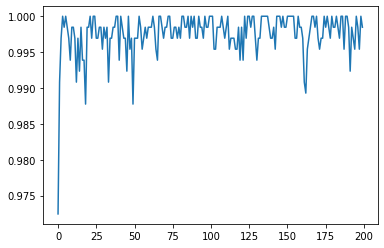

In [27]:
plt.plot(train_acc_central_history_india)
#plt.plot(val_acc_central_history_india)

# central all results

---------------  ORIGA  --------------


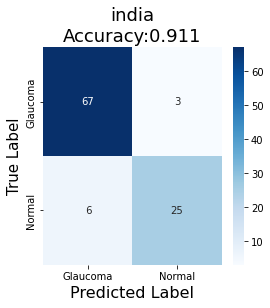

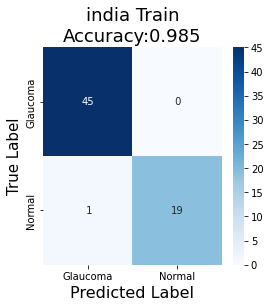

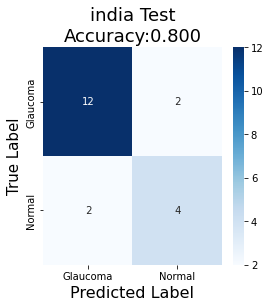

In [86]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(central_model, Open1_data, Open1_label, name='india')
confusion_matrix_result(central_model, Open1_train_data, Open1_train_label, name='india Train')
confusion_matrix_result(central_model, Open1_test_data, Open1_test_label, name='india Test')

---------------  ORIGA  --------------


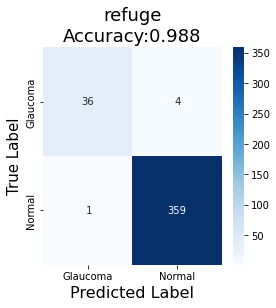

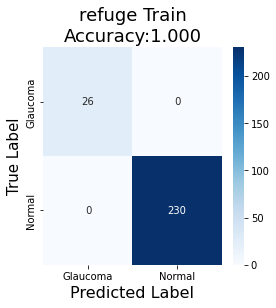

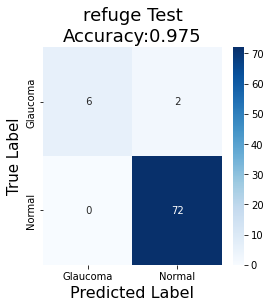

In [87]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(central_model, refuge_data, refuge_label, name='refuge')
confusion_matrix_result(central_model, refuge_train_data, refuge_train_label, name='refuge Train')
confusion_matrix_result(central_model, refuge_test_data, refuge_test_label, name='refuge Test')

---------------  ORIGA  --------------


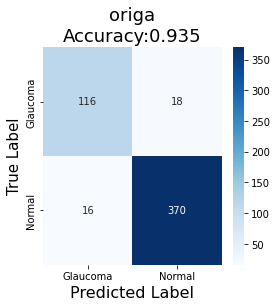

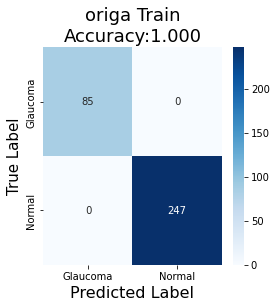

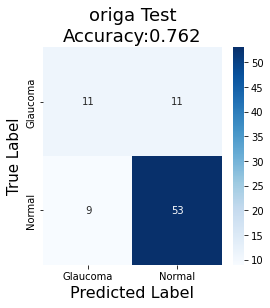

In [88]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(central_model, origa_data, origa_label, name='origa')
confusion_matrix_result(central_model, origa_train_data, origa_train_label, name='origa Train')
confusion_matrix_result(central_model, origa_test_data, origa_test_label, name='origa Test')

Text(0.5, 1.0, 'Training and Validation loss')

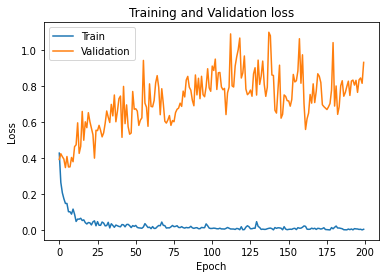

In [36]:
plt.plot(train_loss_central_history)
plt.plot(val_loss_central_history)
plt.ylabel('Loss')
plt.legend(['Train ','Validation'])
plt.xlabel('Epoch')
plt.title('Training and Validation loss')

In [37]:

max_central_save = max_find(val_acc_central_history)
#plt.axvline(x=max_central_save, color='b', label='axvline - full height')

Text(0.5, 1.0, 'All loss')

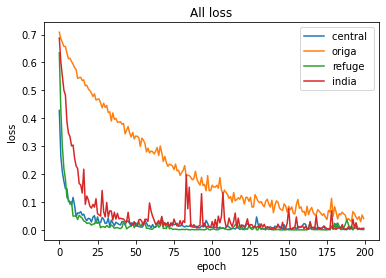

In [38]:
plt.plot(train_loss_central_history)
plt.plot(train_loss_origa_history)
plt.plot(train_loss_refuge_history)
plt.plot(train_loss_india_history)
plt.legend(['central ','origa', 'refuge', 'india'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('All loss')


Text(0.5, 1.0, 'Training and Validation loss')

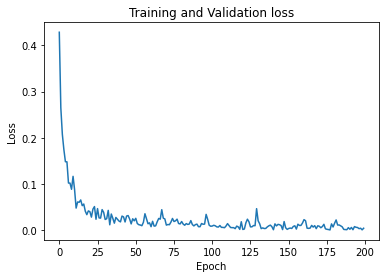

In [39]:
plt.plot(train_loss_central_history)
#plt.plot(val_loss_central_history)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


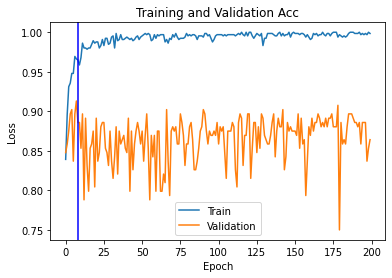

In [40]:
plt.plot(train_acc_central_history)
plt.plot(val_acc_central_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')
plt.axvline(x=max_central_save, color='b', label='axvline - full height')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


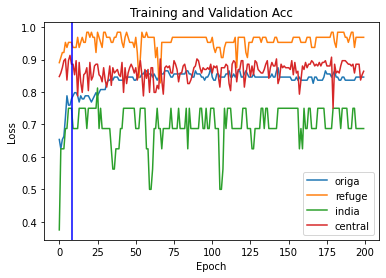

In [41]:
plt.plot(val_acc_origa_history)
plt.plot(val_acc_refuge_history)
plt.plot(val_acc_india_history)
plt.plot(val_acc_central_history)
plt.legend(loc = "lower left")
plt.legend(['origa','refuge','india ','central'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')
plt.axvline(x=max_central_save, color='b', label='axvline - full height')

# central learning for refuge + india

In [15]:
from sklearn.model_selection import train_test_split

origa_train_data, origa_valid_data, origa_train_label, origa_valid_label = train_test_split(origa_data,
                                                                                     origa_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_label,
                                                                                     random_state = 10)

origa_train_data, origa_test_data, origa_train_label, origa_test_label = train_test_split(origa_train_data,
                                                                                     origa_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_train_label,
                                                                                     random_state = 10)


refuge_train_data, refuge_test_data, refuge_train_label, refuge_test_label = train_test_split(refuge_data,
                                                                                     refuge_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_label,
                                                                                     random_state = 10)



refuge_train_data, refuge_valid_data, refuge_train_label, refuge_valid_label = train_test_split(refuge_train_data,
                                                                                     refuge_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_train_label,
                                                                                     random_state = 10)

# split the data into 80% train/ 20% test

Open1_train_data, Open1_test_data, Open1_train_label, Open1_test_label = train_test_split(Open1_data,
                                                                                          Open1_label,
                                                                                          test_size = 20,
                                                                                          stratify = Open1_label,
                                                                                          random_state = 10)


Open1_train_data, Open1_valid_data, Open1_train_label, Open1_valid_label = train_test_split(Open1_train_data,
                                                                                          Open1_train_label,
                                                                                          test_size = 16,
                                                                                          stratify = Open1_train_label,
                                                                                          random_state = 10)

print('origa train :', origa_train_data.shape, ',Test :', origa_test_data.shape)
print('refuge train :', refuge_train_data.shape, ',Test :', refuge_test_data.shape)
print('Open1 train :', Open1_train_data.shape, ',valid :', Open1_valid_data.shape)
print(origa_train_label.shape)
print(refuge_train_label.shape)
print(Open1_train_label.shape)

central_train_data = np.concatenate([refuge_train_data,
                                   
                                    Open1_train_data], 0)

central_valid_data = np.concatenate([refuge_valid_data,
                                   
                                    Open1_valid_data], 0)

central_test_data = np.concatenate([refuge_test_data,
                                 
                                    Open1_test_data], 0)

central_train_label = np.concatenate([refuge_train_label,
                                   
                                     Open1_train_label], 0)

central_valid_label = np.concatenate([refuge_valid_label,
                                   
                                     Open1_valid_label], 0)

central_test_label = np.concatenate([refuge_test_label,
                                 
                                     Open1_test_label], 0)


origa train : (332, 224, 224, 3) ,Test : (84, 224, 224, 3)
refuge train : (256, 224, 224, 3) ,Test : (80, 224, 224, 3)
Open1 train : (65, 224, 224, 3) ,valid : (16, 224, 224, 3)
(332,)
(256,)
(65,)


In [44]:
train_acc_central_history = []
train_loss_central_history = []
val_acc_central_history = []
val_loss_central_history = []

In [ ]:
central_model = efficient_model()

central_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/fl_new_model/central_refuge_india.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_ = [checkpoint]
central_history = central_model.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(central_train_label) / batch_size,
                                            validation_data = (central_valid_data, np.eye(2)[central_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_,
                                            verbose = 1)

train_acc_central_history.extend(central_history.history['accuracy'])
train_loss_central_history.extend(central_history.history['loss'])
val_acc_central_history.extend(central_history.history['val_accuracy'])
val_loss_central_history.extend(central_history.history['val_loss'])

In [16]:
global_model = efficient_model()
global_model.load_weights("D:/fl_new_model/central_refuge_india.hdf5")

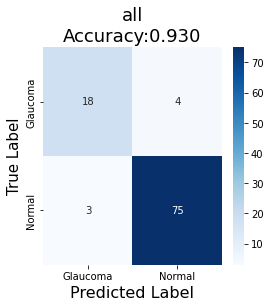

In [18]:
confusion_matrix_result(global_model, central_test_data, central_test_label, name = 'all')

---------------  ORIGA  --------------


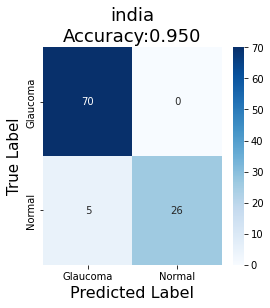

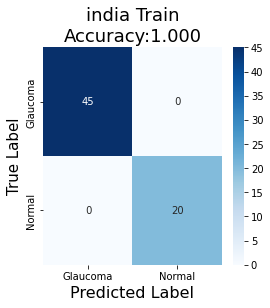

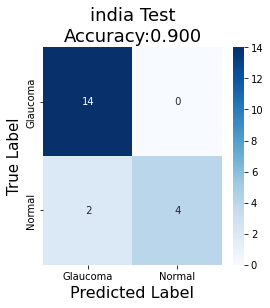

In [105]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(central_model, Open1_data, Open1_label, name='india')
confusion_matrix_result(central_model, Open1_train_data, Open1_train_label, name='india Train')
confusion_matrix_result(central_model, Open1_test_data, Open1_test_label, name='india Test')


---------------  ORIGA  --------------


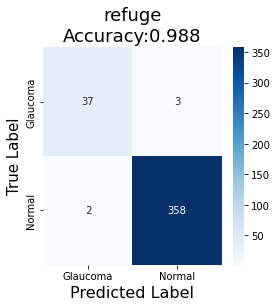

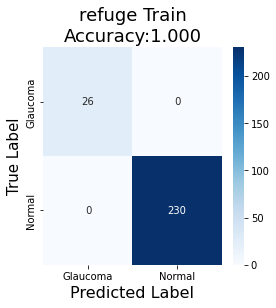

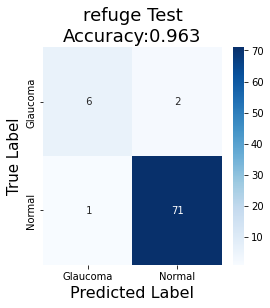

In [106]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(central_model, refuge_data, refuge_label, name='refuge')
confusion_matrix_result(central_model, refuge_train_data, refuge_train_label, name='refuge Train')
confusion_matrix_result(central_model, refuge_test_data, refuge_test_label, name='refuge Test')


---------------  ORIGA  --------------


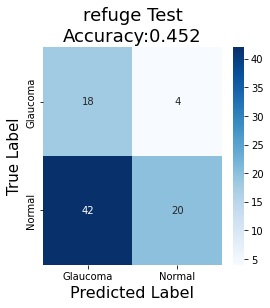

In [48]:
print('---------------  ORIGA  --------------')

confusion_matrix_result(central_model, origa_test_data, origa_test_label, name='refuge Test')


Text(0.5, 1.0, 'Training  loss central')

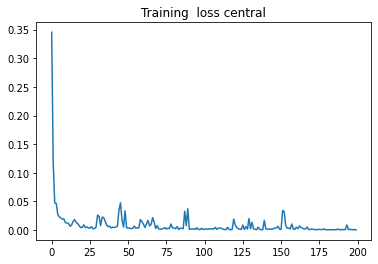

In [46]:
plt.plot(train_loss_central_history)
plt.title('Training  loss central')

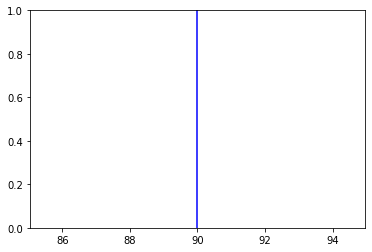

In [49]:

max_central_rl_save = max_find(val_acc_central_history)
plt.axvline(x=max_central_rl_save, color='b', label='axvline - full height')

In [50]:
print(max_central_rl_save)

90


Text(0.5, 1.0, 'Training and Validation Acc')

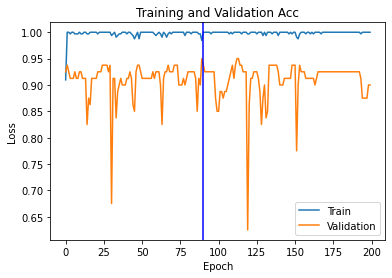

In [51]:
#plt.plot(val_loss_india_history)
plt.plot(train_acc_central_history)
plt.plot(val_acc_central_history)
plt.axvline(x=max_central_rl_save, color='b', label='axvline - full height')
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')

Text(0.5, 1.0, 'All loss')

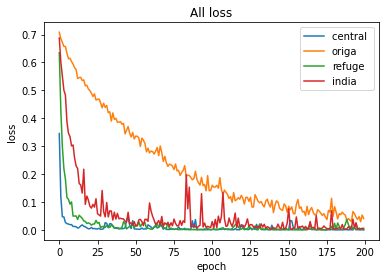

In [52]:
plt.plot(train_loss_central_history)
plt.plot(train_loss_origa_history)
plt.plot(train_loss_refuge_history)
plt.plot(train_loss_india_history)
plt.legend(['central ','origa', 'refuge', 'india'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('All loss')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


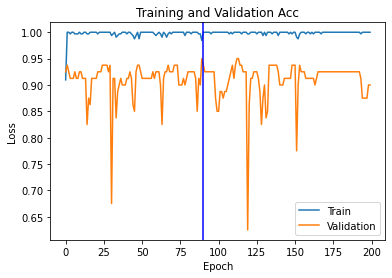

In [53]:

plt.plot(train_acc_central_history)
plt.plot(val_acc_central_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')
plt.axvline(x=max_central_rl_save, color='b', label='axvline - full height')

In [54]:
central_model.save('D:/individual_model_new/central_refuge_india.hdf5')

c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [55]:
print(max_central_rl_save)

90


# O + R

In [18]:
from sklearn.model_selection import train_test_split

origa_train_data, origa_valid_data, origa_train_label, origa_valid_label = train_test_split(origa_data,
                                                                                     origa_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_label,
                                                                                     random_state = 10)

origa_train_data, origa_test_data, origa_train_label, origa_test_label = train_test_split(origa_train_data,
                                                                                     origa_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_train_label,
                                                                                     random_state = 10)


refuge_train_data, refuge_test_data, refuge_train_label, refuge_test_label = train_test_split(refuge_data,
                                                                                     refuge_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_label,
                                                                                     random_state = 10)



refuge_train_data, refuge_valid_data, refuge_train_label, refuge_valid_label = train_test_split(refuge_train_data,
                                                                                     refuge_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_train_label,
                                                                                     random_state = 10)

# split the data into 80% train/ 20% test

Open1_train_data, Open1_test_data, Open1_train_label, Open1_test_label = train_test_split(Open1_data,
                                                                                          Open1_label,
                                                                                          test_size = 20,
                                                                                          stratify = Open1_label,
                                                                                          random_state = 10)


Open1_train_data, Open1_valid_data, Open1_train_label, Open1_valid_label = train_test_split(Open1_train_data,
                                                                                          Open1_train_label,
                                                                                          test_size = 16,
                                                                                          stratify = Open1_train_label,
                                                                                          random_state = 10)

print('origa train :', origa_train_data.shape, ',Test :', origa_test_data.shape)
print('refuge train :', refuge_train_data.shape, ',Test :', refuge_test_data.shape)
print('Open1 train :', Open1_train_data.shape, ',valid :', Open1_valid_data.shape)
print(origa_train_label.shape)
print(refuge_train_label.shape)
print(Open1_train_label.shape)

central_train_data = np.concatenate([refuge_train_data,
                                   
                                    origa_train_data], 0)

central_valid_data = np.concatenate([refuge_valid_data,
                                   
                                    origa_valid_data], 0)

central_test_data = np.concatenate([refuge_test_data,
                                 
                                    origa_test_data], 0)

central_train_label = np.concatenate([refuge_train_label,
                                   
                                     origa_train_label], 0)

central_valid_label = np.concatenate([refuge_valid_label,
                                   
                                     origa_valid_label], 0)

central_test_label = np.concatenate([refuge_test_label,
                                 
                                     origa_test_label], 0)


origa train : (332, 224, 224, 3) ,Test : (84, 224, 224, 3)
refuge train : (256, 224, 224, 3) ,Test : (80, 224, 224, 3)
Open1 train : (65, 224, 224, 3) ,valid : (16, 224, 224, 3)
(332,)
(256,)
(65,)


In [19]:
train_acc_central_or_history = []
train_loss_central_or_history = []
val_acc_central_or_history = []
val_loss_central_or_history = []

tf.random.set_seed(500)
import random
seed = 500

np.random.seed(seed)
random.seed(seed)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
epochs = 200
batch_size = 16
or_model = efficient_model()

or_model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/origa_refuge.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_central = [checkpoint]
or_history = or_model.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                            steps_per_epoch = len(central_train_label) / batch_size,
                                            validation_data = (central_valid_data, np.eye(2)[central_valid_label]),
                                            epochs = epochs,
                                            callbacks = callbacks_list_central,
                                            verbose = 1)

train_acc_central_or_history.extend(or_history.history['accuracy'])
train_loss_central_or_history.extend(or_history.history['loss'])
val_acc_central_or_history.extend(or_history.history['val_accuracy'])
val_loss_central_or_history.extend(or_history.history['val_loss'])
or_model.save('D:/origa_refuge.hdf5')


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\Users\user\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
37/36 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.5136
Epoch 00001: val_accuracy improved from -inf to 0.67857, saving model to D:/origa_refuge.hdf5


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


36/36 [==============================] - 21s 274ms/step - loss: 0.6950 - accuracy: 0.5136 - val_loss: 0.6661 - val_accuracy: 0.6786
Epoch 2/200
37/36 [==============================] - ETA: 0s - loss: 0.6634 - accuracy: 0.6735
Epoch 00002: val_accuracy improved from 0.67857 to 0.69048, saving model to D:/origa_refuge.hdf5
36/36 [==============================] - 9s 237ms/step - loss: 0.6634 - accuracy: 0.6735 - val_loss: 0.6564 - val_accuracy: 0.6905
Epoch 3/200
37/36 [==============================] - ETA: 0s - loss: 0.6257 - accuracy: 0.7823
Epoch 00003: val_accuracy did not improve from 0.69048
36/36 [==============================] - 6s 149ms/step - loss: 0.6257 - accuracy: 0.7823 - val_loss: 0.6602 - val_accuracy: 0.6488
Epoch 4/200
37/36 [==============================] - ETA: 0s - loss: 0.6033 - accuracy: 0.7891
Epoch 00004: val_accuracy did not improve from 0.69048
36/36 [==============================] - 5s 145ms/step - loss: 0.6033 - accuracy: 0.7891 - val_loss: 0.6469 - val_

In [21]:
#41
def max_find(find_list):
    i = 0
    tmp1 = 0
    tmp = find_list[0]
    for number in find_list:
        if(number > tmp):
            tmp = number
            i+=1
            tmp1 = i
        else:
            i+=1
    return tmp1

max_or_save = max_find(val_acc_central_or_history)
print(max_or_save)


41


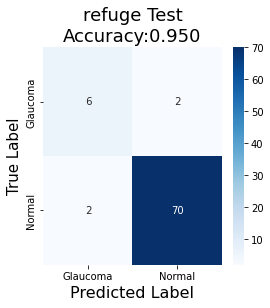

In [22]:

confusion_matrix_result(or_model, refuge_test_data, refuge_test_label, name='refuge Test')





---------------  ORIGA  --------------


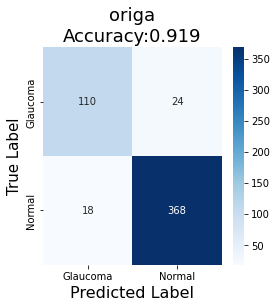

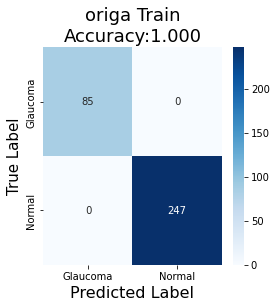

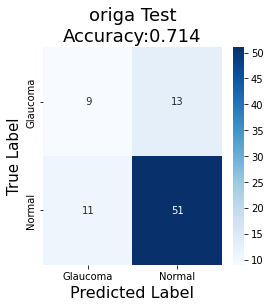

In [23]:
print('---------------  ORIGA  --------------')
confusion_matrix_result(or_model, origa_data, origa_label, name='origa')
confusion_matrix_result(or_model, origa_train_data, origa_train_label, name='origa Train')
confusion_matrix_result(or_model, origa_test_data, origa_test_label, name='origa Test')





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation Loss origa')

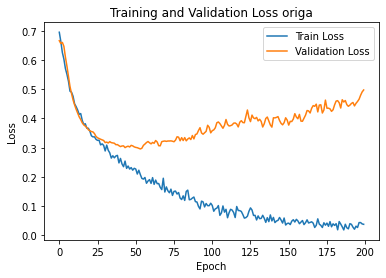

In [24]:
plt.plot(train_loss_central_or_history)
plt.plot(val_loss_central_or_history)
plt.legend(loc = "lower left")
plt.legend(['Train Loss','Validation Loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss origa')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


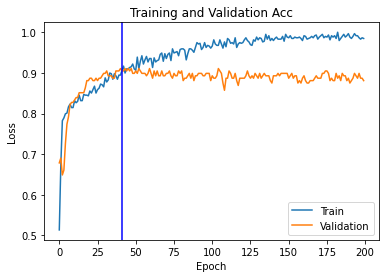

In [27]:

plt.plot(train_acc_central_or_history)
plt.plot(val_acc_central_or_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')
plt.axvline(x=max_or_save, color='b', label='axvline - full height')

# o + i

In [18]:
from sklearn.model_selection import train_test_split

origa_train_data, origa_valid_data, origa_train_label, origa_valid_label = train_test_split(origa_data,
                                                                                     origa_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_label,
                                                                                     random_state = 10)

origa_train_data, origa_test_data, origa_train_label, origa_test_label = train_test_split(origa_train_data,
                                                                                     origa_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = origa_train_label,
                                                                                     random_state = 10)


refuge_train_data, refuge_test_data, refuge_train_label, refuge_test_label = train_test_split(refuge_data,
                                                                                     refuge_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_label,
                                                                                     random_state = 10)



refuge_train_data, refuge_valid_data, refuge_train_label, refuge_valid_label = train_test_split(refuge_train_data,
                                                                                     refuge_train_label,
                                                                                     test_size = 0.2,
                                                                                     stratify = refuge_train_label,
                                                                                     random_state = 10)

# split the data into 80% train/ 20% test

Open1_train_data, Open1_test_data, Open1_train_label, Open1_test_label = train_test_split(Open1_data,
                                                                                          Open1_label,
                                                                                          test_size = 20,
                                                                                          stratify = Open1_label,
                                                                                          random_state = 10)


Open1_train_data, Open1_valid_data, Open1_train_label, Open1_valid_label = train_test_split(Open1_train_data,
                                                                                          Open1_train_label,
                                                                                          test_size = 16,
                                                                                          stratify = Open1_train_label,
                                                                                          random_state = 10)

print('origa train :', origa_train_data.shape, ',Test :', origa_test_data.shape)
print('refuge train :', refuge_train_data.shape, ',Test :', refuge_test_data.shape)
print('Open1 train :', Open1_train_data.shape, ',valid :', Open1_valid_data.shape)
print(origa_train_label.shape)
print(refuge_train_label.shape)
print(Open1_train_label.shape)

central_train_data = np.concatenate([origa_train_data,
                                   
                                    Open1_train_data], 0)

central_valid_data = np.concatenate([origa_valid_data,
                                   
                                    Open1_valid_data], 0)

central_test_data = np.concatenate([origa_test_data,
                                 
                                    Open1_test_data], 0)

central_train_label = np.concatenate([origa_train_label,
                                   
                                     Open1_train_label], 0)

central_valid_label = np.concatenate([origa_valid_label,
                                   
                                     Open1_valid_label], 0)

central_test_label = np.concatenate([origa_test_label,
                                 
                                     Open1_test_label], 0)


origa train : (332, 224, 224, 3) ,Test : (84, 224, 224, 3)
refuge train : (256, 224, 224, 3) ,Test : (80, 224, 224, 3)
Open1 train : (65, 224, 224, 3) ,valid : (16, 224, 224, 3)
(332,)
(256,)
(65,)


In [19]:
train_acc_central_oi_history = []
train_loss_central_oi_history = []
val_acc_central_oi_history = []
val_loss_central_oi_history = []

tf.random.set_seed(500)
import random
seed = 500

np.random.seed(seed)
random.seed(seed)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
epochs = 200
batch_size = 16
oi_model = efficient_model()

oi_model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
filepath="D:/origa_india.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
              mode='max')
callbacks_list_central = [checkpoint]
oi_history = oi_model.fit_generator(datagen.flow(central_train_data, np.eye(2)[central_train_label], batch_size = batch_size),
                                    steps_per_epoch = len(central_train_label) / batch_size,
                                    validation_data = (central_valid_data, np.eye(2)[central_valid_label]),
                                    epochs = epochs,
                                    callbacks = callbacks_list_central,
                                    verbose = 1)

train_acc_central_oi_history.extend(oi_history.history['accuracy'])
train_loss_central_oi_history.extend(oi_history.history['loss'])
val_acc_central_oi_history.extend(oi_history.history['val_accuracy'])
val_loss_central_oi_history.extend(oi_history.history['val_loss'])
oi_model.save('D:/origa_india.hdf5')


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\Users\user\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
25/24 [==============================] - ETA: 0s - loss: 0.7012 - accuracy: 0.5013
Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to D:/origa_india.hdf5


c:\Users\user\Anaconda3\envs\py37\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 18s 334ms/step - loss: 0.7012 - accuracy: 0.5013 - val_loss: 0.6806 - val_accuracy: 0.6250
Epoch 2/200
25/24 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.5945
Epoch 00002: val_accuracy improved from 0.62500 to 0.64167, saving model to D:/origa_india.hdf5
24/24 [==============================] - 6s 251ms/step - loss: 0.6762 - accuracy: 0.5945 - val_loss: 0.6730 - val_accuracy: 0.6417
Epoch 3/200
25/24 [==============================] - ETA: 0s - loss: 0.6604 - accuracy: 0.6650
Epoch 00003: val_accuracy improved from 0.64167 to 0.69167, saving model to D:/origa_india.hdf5
24/24 [==============================] - 7s 294ms/step - loss: 0.6604 - accuracy: 0.6650 - val_loss: 0.6675 - val_accuracy: 0.6917
Epoch 4/200
25/24 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.7078
Epoch 00004: val_accuracy improved from 0.69167 to 0.73333, saving model to D:/origa_india.hdf5
24/24 [==========================

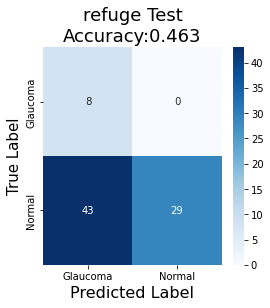

---------------  ORIGA  --------------


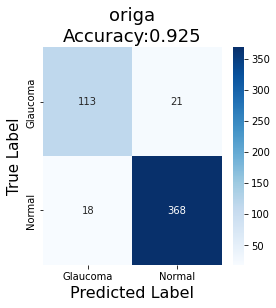

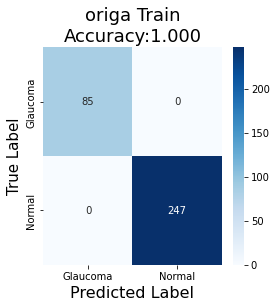

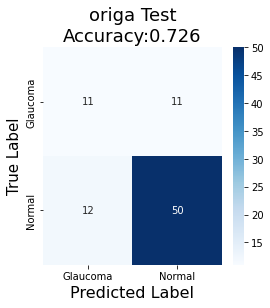

In [20]:

confusion_matrix_result(oi_model, refuge_test_data, refuge_test_label, name='refuge Test')




print('---------------  ORIGA  --------------')
confusion_matrix_result(oi_model, origa_data, origa_label, name='origa')
confusion_matrix_result(oi_model, origa_train_data, origa_train_label, name='origa Train')
confusion_matrix_result(oi_model, origa_test_data, origa_test_label, name='origa Test')




In [22]:
def max_find(find_list):
    i = 0
    tmp1 = 0
    tmp = find_list[0]
    for number in find_list:
        if(number > tmp):
            tmp = number
            i+=1
            tmp1 = i
        else:
            i+=1
    return tmp1
max_oi_save = max_find(val_acc_central_oi_history)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Training and Validation Loss oi')

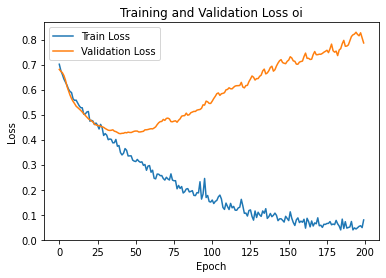

In [25]:


plt.plot(train_loss_central_oi_history)
plt.plot(val_loss_central_oi_history)
plt.legend(loc = "lower left")
plt.legend(['Train Loss','Validation Loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss oi')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


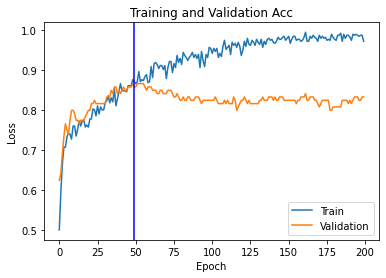

In [27]:

plt.plot(train_acc_central_oi_history)
plt.plot(val_acc_central_oi_history)
plt.legend(loc = "lower left")
plt.legend(['Train ','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Acc')
plt.axvline(x=max_oi_save, color='b', label='axvline - full height')

In [28]:
max_oi_save

49